# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [5]:
sinasc2 = sinasc_raw.copy()

In [6]:
#sinasc_raw.info()

sinasc_raw.select_dtypes(include=['int64','float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ORIGEM      27028 non-null  int64  
 1   CODESTAB    26913 non-null  float64
 2   CODMUNNASC  27028 non-null  int64  
 3   LOCNASC     27028 non-null  int64  
 4   IDADEMAE    27028 non-null  int64  
 5   ESTCIVMAE   26711 non-null  float64
 6   CODOCUPMAE  24121 non-null  float64
 7   QTDFILVIVO  25455 non-null  float64
 8   QTDFILMORT  24930 non-null  float64
 9   CODMUNRES   27028 non-null  int64  
 10  CONSULTAS   27028 non-null  int64  
 11  HORANASC    27007 non-null  float64
 12  APGAR1      26932 non-null  float64
 13  APGAR5      26925 non-null  float64
 14  PESO        27028 non-null  int64  
 15  IDANOMAL    26437 non-null  float64
 16  NUMEROLOTE  27028 non-null  int64  
 17  DIFDATA     27028 non-null  int64  
 18  DTRECORIGA  0 non-null      float64
 19  NATURALMAE  26730 non-nul

In [7]:


sinasc2['QTDGESTANT'].value_counts()



0.0     8610
1.0     8446
2.0     4961
3.0     2177
4.0      887
5.0      359
6.0      186
7.0      101
8.0       41
9.0       25
10.0      12
12.0       3
14.0       3
11.0       2
15.0       1
13.0       1
52.0       1
Name: QTDGESTANT, dtype: int64

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [70]:
#Verificando as latitudes max, min, média e desvio padrão (std) dos municípios.
sinasc3 = sinasc2[['munResNome', 'munResLat']].groupby('munResNome').describe()
sinasc3

munResLat                                    \
                              count      mean           std       min   
munResNome                                                              
Alta Floresta D'Oeste         367.0 -11.93554  1.778782e-14 -11.93554   
Alto Alegre dos Parecis       154.0 -12.13178  1.603937e-14 -12.13178   
Alto Paraíso                  226.0  -9.71667  3.560600e-15  -9.71667   
Alvorada D'Oeste              205.0 -11.34413  3.739481e-14 -11.34413   
Ariquemes                    1729.0  -9.90846  1.474803e-13  -9.90846   
Buritis                       583.0 -10.20981  3.911341e-14 -10.20981   
Cabixi                         80.0 -13.49976  8.937821e-15 -13.49976   
Cacaulândia                    75.0 -10.33887  7.153276e-15 -10.33887   
Cacoal                       1374.0 -11.43387  3.020906e-13 -11.43387   
Campo Novo de Rondônia        166.0 -10.56842  1.069039e-14 -10.56842   
Candeias do Jamari            337.0  -8.78502  4.625395e-14  -8.78502   
Castanheiras                   32.0 -11.42684  7.219121e-15 -11.42684   
Cerejeiras                    237.0 -13.19503  2.314151e-14 -13.19503   
Chupinguaia                   162.0 -12.55684  2.316424e-14 -12.55684   
Colorado do Oeste             214.0 -13.13056  2.848835e-14 -13.13056   
Corumbiara                    127.0 -12.99752  3.566784e-14 -12.99752   
Costa Marques                 233.0 -12.43601  6.408652e-14 -12.43601   
Cujubim                       205.0  -9.37819  3.917552e-14  -9.37819   
Espigão D'Oeste               450.0 -11.52855  1.778334e-15 -11.52855   
Governador Jorge Teixeira     112.0 -10.61207  1.784341e-15 -10.61207   
Guajará-Mirim                 781.0 -10.77388  7.287730e-14 -10.77388   
Itapuã do Oeste               109.0  -9.19187  3.569124e-15  -9.19187   
Jaru                          881.0 -10.43595  5.509834e-14 -10.43595   
Ji-Paraná                    2182.0 -10.88205  1.474714e-13 -10.88205   
Machadinho D'Oeste            500.0  -9.42556  3.556272e-15  -9.42556   
Ministro Andreazza             84.0 -11.19624  7.148103e-15 -11.19624   
Mirante da Serra              164.0 -11.04561  4.098134e-14 -11.04561   
Monte Negro                   199.0 -10.26310  4.808260e-14 -10.26310   
Município ignorado - RO         0.0       NaN           NaN       NaN   
Nova Brasilândia D'Oeste      261.0 -11.72133  2.491677e-14 -11.72133   
Nova Mamoré                   432.0 -10.41177  3.556833e-14 -10.41177   
Nova União                    104.0 -10.91553  8.924796e-15 -10.91553   
Novo Horizonte do Oeste        98.0 -11.70974  8.927449e-15 -11.70974   
Ouro Preto do Oeste           631.0 -10.72357  9.066607e-14 -10.72357   
Parecis                        44.0 -12.17983  7.187574e-15 -12.17983   
Pimenta Bueno                 616.0 -11.67754  1.102236e-13 -11.67754   
Pimenteiras do Oeste           40.0 -13.47656  1.798987e-15 -13.47656   
Porto Velho                  8437.0  -8.76889  2.860104e-13  -8.76889   
Presidente Médici             304.0 -11.17321  4.448214e-14 -11.17321   
Primavera de Rondônia          43.0 -11.82571  1.078428e-14 -11.82571   
Rio Crespo                     50.0  -9.70554  8.971957e-15  -9.70554   
Rolim de Moura                927.0 -11.72226  5.331947e-14 -11.72226   
Santa Luzia D'Oeste            99.0 -11.90842  1.428318e-14 -11.90842   
Seringueiras                  168.0 -11.76712  1.959834e-14 -11.76712   
São Felipe D'Oeste             54.0 -11.91439  1.613733e-14 -11.91439   
São Francisco do Guaporé      303.0 -12.06380  6.761323e-14 -12.06380   
São Miguel do Guaporé         353.0 -11.69949  2.490430e-14 -11.69949   
Teixeirópolis                  64.0 -10.93217  3.580799e-15 -10.93217   
Theobroma                      97.0 -10.24873  1.607026e-14 -10.24873   
Urupá                         170.0 -11.12855  3.741370e-14 -11.12855   
Vale do Anari                  93.0  -9.85139  1.250189e-14  -9.85139   
Vale do Paraíso                81.0 -10.43105  1.787425e-14 -10.43105   
Vilhena    

In [91]:
#calculando valores minimos, maximos, média, desvio padrão, variância e soma respectivamente
sinasc4 = sinasc2.agg({'munResLat':['min','max', 'mean', 'std', 'var', 'sum']})
sinasc4

,munResLat
min,-13.499760
max,-8.768890
mean,-10.377988
std,1.372942
var,1.884968
sum,-280485.875600


In [132]:
sinasc5 = pd.pivot_table(data=sinasc2,
               values='munResLat',
               index='munResNome',
               aggfunc='max' and 'min',
               margins=True,
               margins_name='Total')
sinasc5.sort_values('munResLat')

,munResLat
munResNome,
Total,-13.49976
Cabixi,-13.49976
Pimenteiras do Oeste,-13.47656
Cerejeiras,-13.19503
Colorado do Oeste,-13.13056
Corumbiara,-12.99752
Vilhena,-12.74137
Chupinguaia,-12.55684
Costa Marques,-12.43601


In [133]:
pd.cut(sinasc5['munResLat'], [-13.5, -10.5, -8.77])

munResNome
Alta Floresta D'Oeste        (-13.5, -10.5]
Alto Alegre dos Parecis      (-13.5, -10.5]
Alto Paraíso                 (-10.5, -8.77]
Alvorada D'Oeste             (-13.5, -10.5]
Ariquemes                    (-10.5, -8.77]
Buritis                      (-10.5, -8.77]
Cabixi                       (-13.5, -10.5]
Cacaulândia                  (-10.5, -8.77]
Cacoal                       (-13.5, -10.5]
Campo Novo de Rondônia       (-13.5, -10.5]
Candeias do Jamari           (-10.5, -8.77]
Castanheiras                 (-13.5, -10.5]
Cerejeiras                   (-13.5, -10.5]
Chupinguaia                  (-13.5, -10.5]
Colorado do Oeste            (-13.5, -10.5]
Corumbiara                   (-13.5, -10.5]
Costa Marques                (-13.5, -10.5]
Cujubim                      (-10.5, -8.77]
Espigão D'Oeste              (-13.5, -10.5]
Governador Jorge Teixeira    (-13.5, -10.5]
Guajará-Mirim                (-13.5, -10.5]
Itapuã do Oeste              (-10.5, -8.77]
Jaru                 

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [137]:
sinasc6 = sinasc2[['munResNome', 'munResArea']].groupby('munResNome').describe()
sinasc6

munResArea                                      \
                               count       mean           std        min   
munResNome                                                                 
Alta Floresta D'Oeste          367.0   7067.025  4.826903e-11   7067.025   
Alto Alegre dos Parecis        154.0   3958.273  2.281155e-12   3958.273   
Alto Paraíso                   226.0   2651.822  3.646054e-12   2651.822   
Alvorada D'Oeste               205.0   3029.189  1.002893e-11   3029.189   
Ariquemes                     1729.0   4426.571  2.074248e-10   4426.571   
Buritis                        583.0   3265.809  4.460351e-11   3265.809   
Cabixi                          80.0   1314.352  6.864247e-13   1314.352   
Cacaulândia                     75.0   1961.778  9.156193e-13   1961.778   
Cacoal                        1374.0   3792.998  2.502021e-11   3792.998   
Campo Novo de Rondônia         166.0   3442.005  3.648986e-12   3442.005   
Candeias do Jamari             337.0   6843.868  8.197624e-12   6843.868   
Castanheiras                    32.0    892.842  3.465178e-13    892.842   
Cerejeiras                     237.0   2783.300  2.734259e-12   2783.300   
Chupinguaia                    162.0   5126.723  9.123148e-13   5126.723   
Colorado do Oeste              214.0   1451.060  1.823254e-12   1451.060   
Corumbiara                     127.0   3060.321  3.195838e-12   3060.321   
Costa Marques                  233.0   4987.177  8.203074e-12   4987.177   
Cujubim                        205.0   3863.943  9.117211e-13   3863.943   
Espigão D'Oeste                450.0   4518.035  3.550977e-11   4518.035   
Governador Jorge Teixeira      112.0   5067.384  4.567912e-12   5067.384   
Guajará-Mirim                  781.0  24855.724  2.256992e-10  24855.724   
Itapuã do Oeste                109.0   4081.583  3.197935e-12   4081.583   
Jaru                           881.0   2944.128  2.275028e-11   2944.128   
Ji-Paraná                     2182.0   6896.648  4.184635e-11   6896.648   
Machadinho D'Oeste             500.0   8509.270  9.104056e-12   8509.270   
Ministro Andreazza              84.0    798.083  9.149572e-13    798.083   
Mirante da Serra               164.0   1191.875  0.000000e+00   1191.875   
Monte Negro                    199.0   1931.378  6.610467e-12   1931.378   
Município ignorado - RO          0.0        NaN           NaN        NaN   
Nova Brasilândia D'Oeste       261.0   1703.008  1.047928e-11   1703.008   
Nova Mamoré                    432.0  10071.643  6.555954e-11  10071.643   
Nova União                     104.0    807.126  4.569495e-13    807.126   
Novo Horizonte do Oeste         98.0    843.446  5.713567e-13    843.446   
Ouro Preto do Oeste            631.0   1969.850  9.102162e-13   1969.850   
Parecis                         44.0   2548.683  1.380014e-12   2548.683   
Pimenta Bueno                  616.0   6240.932  2.366608e-11   6240.932   
Pimenteiras do Oeste            40.0   6014.733  5.526487e-12   6014.733   
Porto Velho                   8437.0  34096.394  4.547743e-09  34096.394   
Presidente Médici              304.0   1758.465  1.070418e-11   1758.465   
Primavera de Rondônia           43.0    605.692  5.751615e-13    605.692   
Rio Crespo                      50.0   1717.640  4.593642e-13   1717.640   
Rolim de Moura                 927.0   1457.888  1.819971e-11   1457.888   
Santa Luzia D'Oeste             99.0   1197.796  1.142654e-12   1197.796   
Seringueiras                   168.0   3773.505  3.648855e-12   3773.505   
São Felipe D'Oeste              54.0    541.647  5.737717e-13    541.647   
São Francisco do Guaporé       303.0  10959.767  5.465995e-12  10959.767   
São Miguel do Guaporé          353.0   7460.219  3.187750e-11   7460.219   
Teixeirópolis                   64.0    459.978  6.302206e-13    459.978   
Theobroma                       97.0   2197.413  0.000000e+00   2197.413   
Urupá                          170.0    831.857  1.710340e-12    831.857  

In [145]:
sinasc6 = pd.pivot_table(data=sinasc2,
               values='munResArea',
               index='munResNome',
               aggfunc='max' and 'min',
               margins=True,
               margins_name='Total')
pd.cut(sinasc6['munResArea'], [459, 3000, 34097])

munResNome
Alta Floresta D'Oeste        (3000, 34097]
Alto Alegre dos Parecis      (3000, 34097]
Alto Paraíso                   (459, 3000]
Alvorada D'Oeste             (3000, 34097]
Ariquemes                    (3000, 34097]
Buritis                      (3000, 34097]
Cabixi                         (459, 3000]
Cacaulândia                    (459, 3000]
Cacoal                       (3000, 34097]
Campo Novo de Rondônia       (3000, 34097]
Candeias do Jamari           (3000, 34097]
Castanheiras                   (459, 3000]
Cerejeiras                     (459, 3000]
Chupinguaia                  (3000, 34097]
Colorado do Oeste              (459, 3000]
Corumbiara                   (3000, 34097]
Costa Marques                (3000, 34097]
Cujubim                      (3000, 34097]
Espigão D'Oeste              (3000, 34097]
Governador Jorge Teixeira    (3000, 34097]
Guajará-Mirim                (3000, 34097]
Itapuã do Oeste              (3000, 34097]
Jaru                           (459, 3000]


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [146]:
sinasc7 = sinasc2[['munResNome', 'munResAlt']].groupby('munResNome').describe()
sinasc7

munResAlt                                          \
                              count   mean  std    min    25%    50%    75%   
munResNome                                                                    
Alta Floresta D'Oeste         367.0  338.0  0.0  338.0  338.0  338.0  338.0   
Alto Alegre dos Parecis       154.0  397.0  0.0  397.0  397.0  397.0  397.0   
Alto Paraíso                  226.0  128.0  0.0  128.0  128.0  128.0  128.0   
Alvorada D'Oeste              205.0  182.0  0.0  182.0  182.0  182.0  182.0   
Ariquemes                    1729.0  139.0  0.0  139.0  139.0  139.0  139.0   
Buritis                       583.0  153.0  0.0  153.0  153.0  153.0  153.0   
Cabixi                         80.0  236.0  0.0  236.0  236.0  236.0  236.0   
Cacaulândia                    75.0  161.0  0.0  161.0  161.0  161.0  161.0   
Cacoal                       1374.0  177.0  0.0  177.0  177.0  177.0  177.0   
Campo Novo de Rondônia        166.0  206.0  0.0  206.0  206.0  206.0  206.0   
Candeias do Jamari            337.0   85.0  0.0   85.0   85.0   85.0   85.0   
Castanheiras                   32.0  215.0  0.0  215.0  215.0  215.0  215.0   
Cerejeiras                    237.0  263.0  0.0  263.0  263.0  263.0  263.0   
Chupinguaia                   162.0  340.0  0.0  340.0  340.0  340.0  340.0   
Colorado do Oeste             214.0  419.0  0.0  419.0  419.0  419.0  419.0   
Corumbiara                    127.0  269.0  0.0  269.0  269.0  269.0  269.0   
Costa Marques                 233.0  145.0  0.0  145.0  145.0  145.0  145.0   
Cujubim                       205.0  111.0  0.0  111.0  111.0  111.0  111.0   
Espigão D'Oeste               450.0  263.0  0.0  263.0  263.0  263.0  263.0   
Governador Jorge Teixeira     112.0  202.0  0.0  202.0  202.0  202.0  202.0   
Guajará-Mirim                 781.0  133.0  0.0  133.0  133.0  133.0  133.0   
Itapuã do Oeste               109.0   99.0  0.0   99.0   99.0   99.0   99.0   
Jaru                          881.0  163.0  0.0  163.0  163.0  163.0  163.0   
Ji-Paraná                    2182.0  157.0  0.0  157.0  157.0  157.0  157.0   
Machadinho D'Oeste            500.0  144.0  0.0  144.0  144.0  144.0  144.0   
Ministro Andreazza             84.0  266.0  0.0  266.0  266.0  266.0  266.0   
Mirante da Serra              164.0  212.0  0.0  212.0  212.0  212.0  212.0   
Monte Negro                   199.0  155.0  0.0  155.0  155.0  155.0  155.0   
Município ignorado - RO         0.0    NaN  NaN    NaN    NaN    NaN    NaN   
Nova Brasilândia D'Oeste      261.0  259.0  0.0  259.0  259.0  259.0  259.0   
Nova Mamoré                   432.0  151.0  0.0  151.0  151.0  151.0  151.0   
Nova União                    104.0  241.0  0.0  241.0  241.0  241.0  241.0   
Novo Horizonte do Oeste        98.0  230.0  0.0  230.0  230.0  230.0  230.0   
Ouro Preto do Oeste           631.0  252.0  0.0  252.0  252.0  252.0  252.0   
Parecis                        44.0  296.0  0.0  296.0  296.0  296.0  296.0   
Pimenta Bueno                 616.0  186.0  0.0  186.0  186.0  186.0  186.0   
Pimenteiras do Oeste           40.0  170.0  0.0  170.0  170.0  170.0  170.0   
Porto Velho                  8437.0   87.0  0.0   87.0   87.0   87.0   87.0   
Presidente Médici             304.0  178.0  0.0  178.0  178.0  178.0  178.0   
Primavera de Rondônia          43.0  245.0  0.0  245.0  245.0  245.0  245.0   
Rio Crespo                     50.0  124.0  0.0  124.0  124.0  124.0  124.0   
Rolim de Moura                927.0  227.0  0.0  227.0  227.0  227.0  227.0   
Santa Luzia D'Oeste            99.0  265.0  0.0  265.0  265.0  265.0  265.0   
Seringueiras                  168.0  186.0  0.0  186.0  186.0  186.0  186.0   
São Felipe D'Oeste             54.0  270.0  0.0  270.0  270.0  270.0  270.0   
São Francisco do Guaporé      303.0  166.0  0.0  166.0  166.0  166.0  166.0   
São Miguel do Guaporé         353.0  191.0  0.0  191.0  191.0  191.0  191.0   
Teixeirópolis                  64.0  191.0  0.0  191.0  191.0  191.0  191.0 

In [147]:
sinasc7 = pd.pivot_table(data=sinasc2,
               values='munResArea',
               index='munResNome',
               aggfunc='max' and 'min',
               margins=True,
               margins_name='Total')
pd.cut(sinasc7['munResArea'], [459, 3000, 34097])

munResNome
Alta Floresta D'Oeste        (3000, 34097]
Alto Alegre dos Parecis      (3000, 34097]
Alto Paraíso                   (459, 3000]
Alvorada D'Oeste             (3000, 34097]
Ariquemes                    (3000, 34097]
Buritis                      (3000, 34097]
Cabixi                         (459, 3000]
Cacaulândia                    (459, 3000]
Cacoal                       (3000, 34097]
Campo Novo de Rondônia       (3000, 34097]
Candeias do Jamari           (3000, 34097]
Castanheiras                   (459, 3000]
Cerejeiras                     (459, 3000]
Chupinguaia                  (3000, 34097]
Colorado do Oeste              (459, 3000]
Corumbiara                   (3000, 34097]
Costa Marques                (3000, 34097]
Cujubim                      (3000, 34097]
Espigão D'Oeste              (3000, 34097]
Governador Jorge Teixeira    (3000, 34097]
Guajará-Mirim                (3000, 34097]
Itapuã do Oeste              (3000, 34097]
Jaru                           (459, 3000]


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [148]:
sinasc8 = sinasc2.set_index('munResNome')

mapping = {
    'Candeias do Jamari': 'Porto Velho',
    'Guajará-Mirim': 'Porto Velho',
    'Itapuã do Oeste': 'Porto Velho',
    'Nova Mamoré': 'Porto Velho',
    'Porto Velho': 'Porto Velho',
    'Alto Paraíso': 'Ariquemes',
    'Ariquemes': 'Ariquemes',
    'Buritis': 'Ariquemes',
    'Cacaulândia': 'Ariquemes',
    'Campo Novo de Rondônia': 'Ariquemes',
    'Cujubim': 'Ariquemes',
    'Monte Negro': 'Ariquemes',
    'Rio Crespo': 'Ariquemes',
    'Governador Jorge Teixeira': 'Jaru',
    'Jaru': 'Jaru',
    'Machadinho d''Oeste': 'Jaru',
    'Theobroma': 'Jaru',
    'Vale do Anari': 'Jaru',
    'Alvorada d''Oeste': 'Ji-Paraná',
    'Costa Marques': 'Ji-Paraná',
    'Ji-Paraná': 'Ji-Paraná',
    'Mirante da Serra': 'Ji-Paraná',
    'Nova União': 'Ji-Paraná',
    'Ouro Preto do Oeste': 'Ji-Paraná',
    'Presidente Médici': 'Ji-Paraná',
    'São Francisco do Guaporé': 'Ji-Paraná',
    'São Miguel do Guaporé': 'Ji-Paraná',
    'Seringueiras': 'Ji-Paraná',
    'Teixeirópolis': 'Ji-Paraná',
    'Urupá': 'Ji-Paraná',
    'Vale do Paraíso': 'Ji-Paraná',
    'Alta Floresta d''Oeste': 'Cacoal',
    'Alto Alegre dos Parecis': 'Cacoal',
    'Cacoal': 'Cacoal',
    'Castanheiras': 'Cacoal',
    'Espigão d''Oeste': 'Cacoal',
    'Ministro Andreazza': 'Cacoal',
    'Nova Brasilândia d''Oeste': 'Cacoal',
    'Novo Horizonte do Oeste': 'Cacoal',
    'Parecis': 'Cacoal',
    'Pimenta Bueno': 'Cacoal',
    'Primavera de Rondônia': 'Cacoal',
    'Rolim de Moura': 'Cacoal',
    'Santa Luzia d''Oeste': 'Cacoal',
    'São Felipe d''Oeste': 'Cacoal',
    'Cabixi': 'Vilhena',
    'Cerejeiras': 'Vilhena',
    'Chupinguaia': 'Vilhena',
    'Colorado do Oeste': 'Vilhena',
    'Corumbiara': 'Vilhena',
    'Pimenteiras do Oeste': 'Vilhena',
    'Vilhena': 'Vilhena'
}

sinasc8.groupby(mapping)['IDADEMAE'].mean()

munResNome
Ariquemes      25.459635
Cacoal         26.434757
Jaru           25.805579
Ji-Paraná      26.108682
Porto Velho    26.166303
Vilhena        26.417143
Name: IDADEMAE, dtype: float64

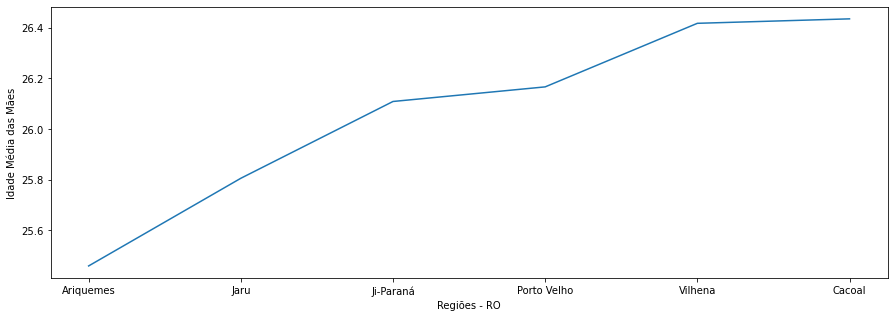

In [149]:
sinasc8.groupby(mapping)['IDADEMAE'].mean().sort_values().plot(figsize = [15,5])

plt.ylabel('Idade Média das Mães');
plt.xlabel('Regiões - RO');

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [150]:
mapping = {'Porto Velho': 'IDH-M alto', 'Vilhena': 'IDH-M alto', 'Cacoal': 'IDH-M alto', 'Ji-Paraná': 'IDH-M alto', 'Pimenta Bueno': 'IDH-M alto', 'Ariquemes': 'IDH-M alto', 'Rolim de Moura': 'IDH-M alto', 'Cerejeiras': 'IDH-M médio', 'Jaru': 'IDH-M médio', 'Colorado do Oeste': 'IDH-M médio', 'Ouro Preto do Oeste': 'IDH-M médio', 'Espigão d''Oeste': 'IDH-M médio', 'Santa Luzia d''Oeste': 'IDH-M médio', 'Pimenteiras do Oeste': 'IDH-M médio', 'Presidente Médici': 'IDH-M médio', 'Castanheiras': 'IDH-M médio', 'Guajará-Mirim': 'IDH-M médio', 'Chupinguaia': 'IDH-M médio', 'Cabixi': 'IDH-M médio', 'Candeias do Jamari': 'IDH-M médio', 'São Felipe d''Oeste': 'IDH-M médio', 'Cacaulândia': 'IDH-M médio', 'São Miguel do Guaporé': 'IDH-M médio', 'Mirante da Serra': 'IDH-M médio', 'Alvorada d''Oeste': 'IDH-M médio', 'Teixeirópolis': 'IDH-M médio', 'Nova Brasilândia d''Oeste': 'IDH-M médio', 'Rio Crespo': 'IDH-M médio', 'Primavera de Rondônia': 'IDH-M médio', 'Alta Floresta d''Oeste': 'IDH-M médio', 'Ministro Andreazza': 'IDH-M médio', 'Novo Horizonte do Oeste': 'IDH-M médio', 'Vale do Paraíso': 'IDH-M médio', 'Alto Paraíso': 'IDH-M médio', 'Parecis': 'IDH-M médio', 'Buritis': 'IDH-M médio', 'Itapuã do Oeste': 'IDH-M médio', 'Corumbiara': 'IDH-M médio', 'Cujubim': 'IDH-M médio', 'Costa Marques': 'IDH-M médio', 'São Francisco do Guaporé': 'IDH-M médio', 'Urupá': 'IDH-M médio', 'Monte Negro': 'IDH-M médio', 'Seringueiras': 'IDH-M baixo', 'Governador Jorge Teixeira': 'IDH-M baixo', 'Machadinho d''Oeste': 'IDH-M baixo', 'Campo Novo de Rondônia': 'IDH-M baixo', 'Alto Alegre dos Parecis': 'IDH-M baixo', 'Theobroma': 'IDH-M baixo', 'Nova União': 'IDH-M baixo', 'Nova Mamoré': 'IDH-M baixo', 'Vale do Anari': 'IDH-M baixo'}

sinasc8.groupby(mapping)['IDADEMAE'].mean().sort_values()

munResNome
IDH-M baixo    25.269231
IDH-M médio    25.848191
IDH-M alto     26.280332
Name: IDADEMAE, dtype: float64

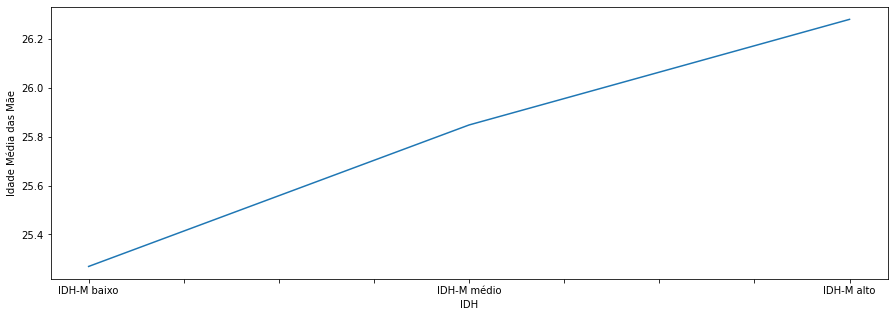

In [151]:
sinasc8.groupby(mapping)['IDADEMAE'].mean().sort_values().plot(figsize = [15,5])

plt.ylabel('Idade Média das Mãe')
plt.xlabel('IDH');

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [13]:
mapping = {'Ariquemes': 'Desenvolvimento moderado', 'Vilhena': 'Desenvolvimento moderado', 'Pimenta Bueno': 'Desenvolvimento moderado', 'Porto Velho': 'Desenvolvimento moderado', 'Ji-Paraná': 'Desenvolvimento moderado', 'Cacoal': 'Desenvolvimento moderado', 'Santa Luzia d''Oeste': 'Desenvolvimento moderado', 'Rolim de Moura': 'Desenvolvimento moderado', 'Chupinguaia': 'Desenvolvimento moderado', 'São Miguel do Guaporé': 'Desenvolvimento moderado', 'Pimenteiras do Oeste': 'Desenvolvimento moderado', 'Teixeirópolis': 'Desenvolvimento moderado', 'Colorado do Oeste': 'Desenvolvimento moderado', 'Jaru': 'Desenvolvimento moderado', 'Rio Crespo': 'Desenvolvimento moderado', 'Primavera de Rondônia': 'Desenvolvimento moderado', 'Alta Floresta d''Oeste': 'Desenvolvimento moderado', 'Ouro Preto do Oeste': 'Desenvolvimento moderado', 'São Francisco do Guaporé': 'Desenvolvimento moderado', 'Candeias do Jamari': 'Desenvolvimento moderado', 'Buritis': 'Desenvolvimento moderado', 'São Felipe d''Oeste': 'Desenvolvimento moderado', 'Presidente Médici': 'Desenvolvimento moderado', 'Cerejeiras': 'Desenvolvimento moderado', 'Monte Negro': 'Desenvolvimento moderado', 'Urupá': 'Desenvolvimento moderado', 'Espigão d''Oeste': 'Desenvolvimento regular', 'Seringueiras': 'Desenvolvimento regular', 'Alvorada d''Oeste': 'Desenvolvimento regular', 'Itapuã do Oeste': 'Desenvolvimento regular', 'Cabixi': 'Desenvolvimento regular', 'Novo Horizonte do Oeste': 'Desenvolvimento regular', 'Nova Brasilândia d''Oeste': 'Desenvolvimento regular', 'Vale do Paraíso': 'Desenvolvimento regular', 'Corumbiara': 'Desenvolvimento regular', 'Alto Paraíso': 'Desenvolvimento regular', 'Cacaulândia': 'Desenvolvimento regular', 'Vale do Anari': 'Desenvolvimento regular', 'Ministro Andreazza': 'Desenvolvimento regular', 'Costa Marques': 'Desenvolvimento regular', 'Nova União': 'Desenvolvimento regular', 'Guajará-Mirim': 'Desenvolvimento regular', 'Mirante da Serra': 'Desenvolvimento regular', 'Parecis': 'Desenvolvimento regular', 'Castanheiras': 'Desenvolvimento regular', 'Theobroma': 'Desenvolvimento regular', 'Machadinho d''Oeste': 'Desenvolvimento regular', 'Campo Novo de Rondônia': 'Desenvolvimento regular', 'Nova Mamoré': 'Desenvolvimento regular', 'Cujubim': 'Desenvolvimento regular', 'Alto Alegre dos Parecis': 'Desenvolvimento regular', 'Governador Jorge Teixeira': 'Desenvolvimento regular'}

sinasc8.groupby(mapping)['IDADEMAE'].mean().sort_values()

munResNome
Desenvolvimento regular     25.412005
Desenvolvimento moderado    26.226921
Name: IDADEMAE, dtype: float64

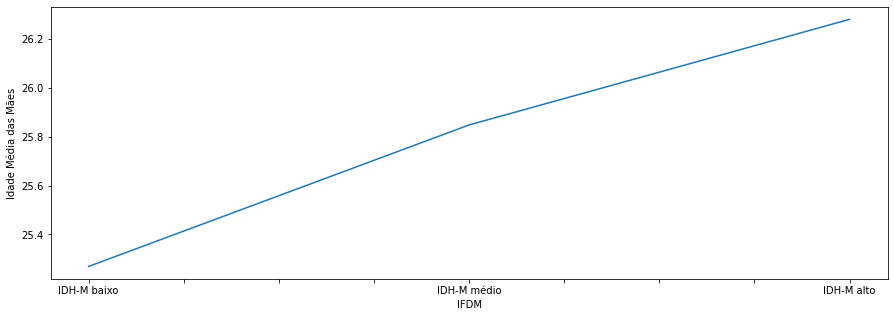

In [152]:
sinasc8.groupby(mapping)['IDADEMAE'].mean().sort_values().plot(figsize = [15,5])

plt.ylabel('Idade Média das Mães')
plt.xlabel('IFDM');

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [178]:
mapping = {'Porto Velho': 'Acima de 1 Bilhão', 'Ji-Paraná': 'Acima de 1 Bilhão', 'Vilhena': 'Acima de 1 Bilhão', 'Ariquemes': 'Acima de 1 Bilhão', 'Cacoal': 'Acima de 1 Bilhão', 'Jaru': 'Acima de 1 Bilhão', 'Rolim de Moura': 'Acima de 1 Bilhão', 'Pimenta Bueno': 'Acima de 1 Bilhão', 'Guajará-Mirim': 'Acima de 500 Milhões', 'Ouro Preto do Oeste': 'Acima de 500 Milhões', 'Buritis': 'Acima de 500 Milhões', 'Machadinho d''Oeste': 'Acima de 500 Milhões', 'Espigão d''Oeste': 'Acima de 500 Milhões', 'São Miguel do Guaporé': 'Acima de 500 Milhões', 'Candeias do Jamari': 'Acima de 500 Milhões', 'Nova Mamoré': 'Acima de 500 Milhões', 'Cerejeiras': 'Acima de 500 Milhões', 'Alta Floresta d''Oeste': 'Acima de 300 Milhões', 'Presidente Médici': 'Acima de 300 Milhões', 'Cujubim': 'Acima de 300 Milhões', 'Nova Brasilândia d''Oeste': 'Acima de 300 Milhões', 'Alto Paraíso': 'Acima de 300 Milhões', 'São Francisco do Guaporé': 'Acima de 300 Milhões', 'Colorado do Oeste': 'Acima de 300 Milhões', 'Monte Negro': 'Acima de 200 Milhões', 'Alto Alegre dos Parecis': 'Acima de 200 Milhões', 'Campo Novo de Rondônia': 'Acima de 200 Milhões', 'Alvorada d''Oeste': 'Acima de 200 Milhões', 'Chupinguaia': 'Acima de 100 Milhões', 'Corumbiara': 'Acima de 100 Milhões', 'Ministro Andreazza': 'Acima de 100 Milhões', 'Urupá': 'Acima de 100 Milhões', 'Costa Marques': 'Acima de 100 Milhões', 'Seringueiras': 'Acima de 100 Milhões', 'Mirante da Serra': 'Acima de 100 Milhões', 'Governador Jorge Teixeira': 'Acima de 100 Milhões', 'Theobroma': 'Acima de 100 Milhões', 'Santa Luzia d''Oeste': 'Acima de 100 Milhões', 'Novo Horizonte do Oeste': 'Acima de 100 Milhões', 'Itapuã do Oeste': 'Acima de 100 Milhões', 'Vale do Paraíso': 'Acima de 100 Milhões', 'Cacaulândia': 'Acima de 100 Milhões', 'Cabixi': 'Acima de 100 Milhões', 'Vale do Anari': 'Acima de 100 Milhões', 'Nova União': 'Até 100 Milhões', 'Parecis': 'Até 100 Milhões', 'Rio Crespo': 'Até 100 Milhões', 'Pimenteiras do Oeste': 'Até 100 Milhões', 'Teixeirópolis': 'Até 100 Milhões', 'São Felipe d''Oeste': 'Até 100 Milhões', 'Castanheiras': 'Até 100 Milhões', 'Primavera de Rondônia': 'Até 100 Milhões'}

sinasc9 = sinasc8.groupby(mapping)['IDADEMAE'].mean().sort_values().sort_index()
sinasc9

munResNome
Acima de 1 Bilhão       26.265562
Acima de 100 Milhões    25.638424
Acima de 200 Milhões    25.146435
Acima de 300 Milhões    25.706070
Acima de 500 Milhões    25.785927
Até 100 Milhões         26.519894
Name: IDADEMAE, dtype: float64

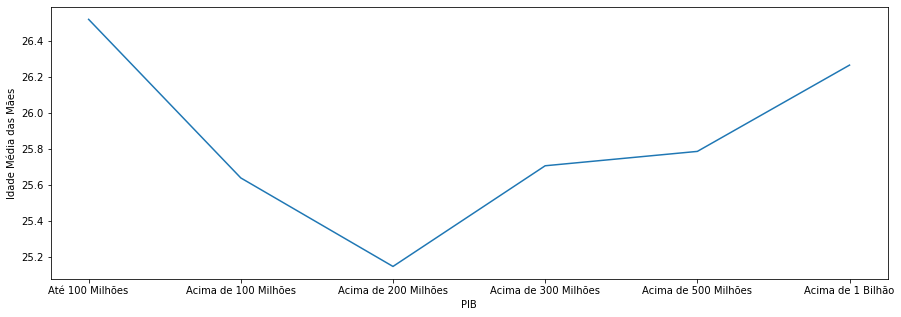

In [186]:
sinasc9.reindex(index = ['Até 100 Milhões', 'Acima de 100 Milhões', 'Acima de 200 Milhões', 'Acima de 300 Milhões', 'Acima de 500 Milhões', 'Acima de 1 Bilhão']).plot(figsize = [15,5])

plt.ylabel('Idade Média das Mães')
plt.xlabel('PIB');

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
 Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

 
- **Nos municípios com IDH maior, a média das idades das mães que deram a luz em 2019 pode ser até 1 ano maior em relação aos municípios de menor IDH.**
- **Aparentemente, não existe uma relação direta entre a idade das mães que deram a luz em 2019 e o PIB.** 
